
# This Jupyter Notebook is done as practice applying the K-Nearest Neighbor Machine Learning Algorithm and the appropiate analytics taught in my data science class for algorithm. 
# The dataset used is from kaggle.com. The heart disease UCI dataset seemed like a reasonably clean dataset to work with to refresh knowledge on using classifiers and to apply other analytics or methods from data science.
# NOTE: the analytics may show that K-Nearest Neighbor is a poor algorithm for this set, but I did not modify the data too much nor did I process the data. I simply used the data as is and performed under random sampling as well as other analytics I learned in my data science class as practice.


In [1]:


import numpy as np

import pandas as pd

heart_dataframe = pd.read_csv(r"C:\Users\KennoHead\Desktop\Data Science and Machine Learning Refresher\heart.csv")


In [2]:
# check the dataframe 
heart_dataframe.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:

# get the columns of the features
heart_feature_columns = list(heart_dataframe.columns)

heart_feature_columns.remove('target')

print(heart_feature_columns)

heart_features = heart_dataframe[ heart_feature_columns ]

heart_labels = heart_dataframe['target']


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [4]:

# examining the csv file will show that 
# there are more positive cases than negative cases

positive_labels = heart_dataframe[heart_dataframe['target'] == 1 ]
negative_labels = heart_dataframe[heart_dataframe['target'] == 0 ]

print(positive_labels.shape)

print(negative_labels.shape)

(165, 14)
(138, 14)


In [5]:

# using imbalanced-learn python module to handle the resampling
# in this approach I'm doing under sampling
# the problem with this approach is that possibly valuable info is lost
# the oversampling approach has it's problems as well 
from imblearn.under_sampling import RandomUnderSampler 

rand_und_sampler = RandomUnderSampler(random_state = 0)

X_features_res, Y_labels_res = rand_und_sampler.fit_resample(heart_features, heart_labels)

print(X_features_res.shape)
print(Y_labels_res.shape)


(276, 13)
(276,)


In [6]:

# train test split
from sklearn.model_selection import train_test_split

X_training, X_testing, Y_training, Y_testing = train_test_split(X_features_res, Y_labels_res, test_size = 0.3, random_state = 0)




In [7]:

# training a k-nearest neighbor classifier with k = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_value = 5

k5_knn_classifier = KNeighborsClassifier(n_neighbors = k_value)

k5_knn_classifier.fit(X_training, Y_training)

k5_knn_predict = k5_knn_classifier.predict(X_testing)

k5_knn_acc = metrics.accuracy_score(Y_testing, k5_knn_predict)



In [8]:

# at this point, with 5 neighbors, the accuracy is 56.62%
# note that accuracy is just one of the metrics to measure a machine learning model's performances
print(k5_knn_acc)


0.5662650602409639


In [9]:

# just some analytics for knn from my data science class
# the data sets used are the same from the train test split cell above

k_values = []
accuracy_values = []

for i in range(1, 65, 1):
    
    ki_knn_clssr = KNeighborsClassifier(n_neighbors=i) 

    ki_knn_clssr.fit(X_training, Y_training)
    
    ki_knn_predict = ki_knn_clssr.predict(X_testing)
    
    k_values.append(i)
    
    ki_knn_acc = metrics.accuracy_score(Y_testing, ki_knn_predict)
    
    accuracy_values.append(ki_knn_acc)
    
print('Process Done!')

Process Done!


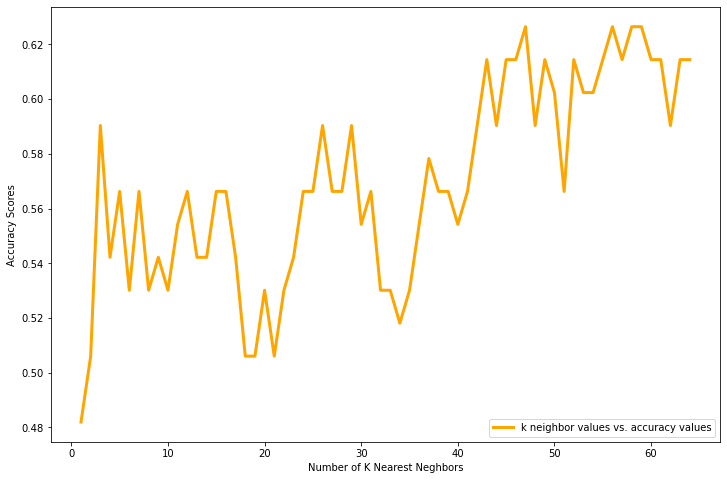

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.xlabel('Number of K Nearest Neghbors')
plt.ylabel('Accuracy Scores')
plt.plot(k_values, accuracy_values, color = 'orange', lw = 3, label = 'k neighbor values vs. accuracy values')
plt.legend(loc='lower right')
plt.show()

# the graph will show how the k values fluctuate as k values increase



In [11]:


# this is just to see the actual values in a dataframe format
# the analytics and visualizations will show that KNN is a poor algorithm for this data set
# NOTE that we did under random sampling to balance the numbers of each class
# and we did not modify much to the original data

result_dataframe = pd.DataFrame()

result_dataframe ['k value'] = k_values

result_dataframe ['accuracy value'] = accuracy_values

result_dataframe


,k value,accuracy value
0,1,0.481928
1,2,0.506024
2,3,0.590361
3,4,0.542169
4,5,0.566265
...,...,...
59,60,0.614458
60,61,0.614458
61,62,0.590361
62,63,0.614458


In [61]:

# reading the data again
# however, this approach we will scale some feature columns
heart_dataframe = pd.read_csv(r"C:\Users\KennoHead\Desktop\Data Science and Machine Learning Refresher\heart.csv")
heart_dataframe.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:

# using sklearn preprocessing to do the scaling
from sklearn import preprocessing

# we only want to scale certain columns of the dataframe
# specifically columns with high variance
heart_dataframe['age'] = preprocessing.scale(heart_dataframe['age'])
heart_dataframe['trestbps'] = preprocessing.scale(heart_dataframe['trestbps'])
heart_dataframe['chol'] = preprocessing.scale(heart_dataframe['chol'])
heart_dataframe['thalach'] = preprocessing.scale(heart_dataframe['thalach'])
heart_dataframe['oldpeak'] = preprocessing.scale(heart_dataframe['oldpeak'])

heart_feat_cols = list(heart_dataframe.columns)
heart_feat_cols.remove('target')

heart_feat = heart_dataframe[heart_feat_cols]
heart_label = heart_dataframe['target']



In [63]:


# repeating the same steps as above
# to compare k values vs accuracies
Xsc_training, Xsc_testing, Ysc_training, Ysc_testing = train_test_split(heart_feat, heart_label, test_size = .3, random_state = 0)

k_values2 = []
accuracy_values2 = []

for i in range(1, 65, 1):
    
    ki_knn_clssr = KNeighborsClassifier(n_neighbors=i) 

    ki_knn_clssr.fit(Xsc_training, Ysc_training)
    
    ki_knn_predict = ki_knn_clssr.predict(Xsc_testing)
    
    k_values2.append(i)
    
    ki_knn_acc = metrics.accuracy_score(Ysc_testing, ki_knn_predict)
    
    accuracy_values2.append(ki_knn_acc)
    
print('Process Done!')


Process Done!


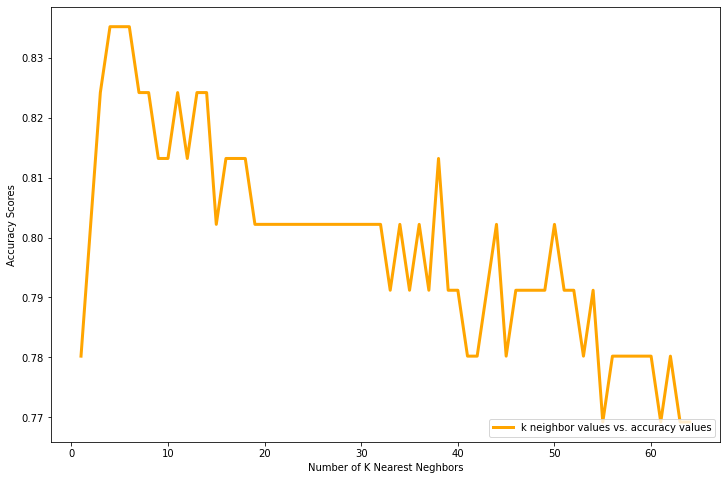

In [64]:

# matplotlib to visualize
# to compare k values vs accuracies
plt.figure(figsize = (12, 8))
plt.xlabel('Number of K Nearest Neghbors')
plt.ylabel('Accuracy Scores')
plt.plot(k_values2, accuracy_values2, color = 'orange', lw = 3, label = 'k neighbor values vs. accuracy values')
plt.legend(loc='lower right')
plt.show()


In [65]:


# using scaled data, knn's model performance is improved
# it seems k = 3, 4, and 5 give the higest accuracy.
result_dataframe2 = pd.DataFrame()

result_dataframe2['k value'] = k_values2

result_dataframe2['accuracy value'] = accuracy_values2

result_dataframe2


,k value,accuracy value
0,1,0.780220
1,2,0.802198
2,3,0.824176
3,4,0.835165
4,5,0.835165
...,...,...
59,60,0.780220
60,61,0.769231
61,62,0.780220
62,63,0.769231
